In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt

# 1. 이미지 셋을 읽어오자
# 2. 이미지 전처리
## 1) 4차원을 만들어주세요=>
##    이미지셋 자체는 3차원: 이미지2차원 + 이미지 여러장
##    이미지 픽셀마다의 특성(특징)을 추출하는 처리를 하기 위한 차원 하나 더 추가
## 2) 데이터를 읽어왔을 때 픽셀 마다의 값의 명암정도만 가지고 있음(0~255)
##      0~1사이로 스케일링(표준화)시켜줌
##       다 255로 나누어주면 됨!!!
## 3) 이미지는 크기가 아주 다양함. 크기를 표준화
# 3. 특성 추출처리
# 4. 특성 추출한 결과를 학습데이터로 넣어서 학습할 예정
##     deep modeling
## 1) 특성추출한 이미지 데이터를 1차원으로 만들어주세요(Flatten())
## 2) 딥러닝 심층신경망(deep MLP)
## 3) fit()
# 5. 모델에 대해 평가
## 1) test데이터를 검증=> overfitting여부 확인!
## 2)시각화로 평가

In [43]:
#1.이미지를 읽어오자
#내장되어 있는 fasion_mnist이미지 다운
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [44]:

train_images[0].shape

(28, 28)

In [45]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [5]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [46]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

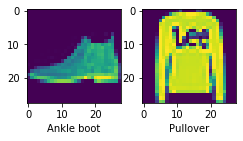

In [47]:
plt.figure(figsize=(10,10))
for x in range(2):
    plt.subplot(5, 5, x+1)
    plt.grid(False)
    plt.imshow(test_images[x])
    plt.xlabel(class_names[test_labels[x]])
# fig, axs = plt.subplots(1, 2, figsize=(2,2))
# axs[0].imshow(test_images[0])
# axs[0].axis('off')
# axs[1].imshow(test_images[1])
# axs[1].axis('off')
# plt.show()

In [6]:
#train,test데이터를 나누어보자.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [7]:
train_images.shape

(60000, 28, 28, 1)

In [8]:
train_images, test_images = train_images / 255.0, test_images / 255.0 

In [9]:
## 3. 특성 추출처리 

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))


In [11]:
# 4.
#입력층
model.add(Flatten())
#히든층
model.add(Dense(64,activation='relu'))
#출력층
model.add(Dense(10, activation='softmax'))#카테고리 10개로 출력해줘(0부터9)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [13]:
#설정
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
#공부시켜보자
history = model.fit(train_images, train_labels, epochs=5, batch_size=100)
history

Epoch 1/5
600/600 [==============================] - 20s 32ms/step - loss: 0.5867 - accuracy: 0.7873
Epoch 2/5
600/600 [==============================] - 19s 32ms/step - loss: 0.3674 - accuracy: 0.8691
Epoch 3/5
600/600 [==============================] - 19s 32ms/step - loss: 0.3182 - accuracy: 0.8837
Epoch 4/5
600/600 [==============================] - 19s 32ms/step - loss: 0.2862 - accuracy: 0.8950
Epoch 5/5
600/600 [==============================] - 19s 32ms/step - loss: 0.2656 - accuracy: 0.9021


In [15]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
loss, acc

313/313 - 1s - loss: 0.2854 - accuracy: 0.8981 - 1s/epoch - 4ms/step


(0.28540709614753723, 0.8981000185012817)

In [16]:
y_pred = model.predict(test_images)
y_pred[0]

array([5.9695103e-06, 6.2813939e-08, 2.4992033e-07, 3.2754369e-07,
       2.4231809e-08, 4.9702625e-04, 2.3503046e-07, 1.3800605e-03,
       1.4051259e-04, 9.9797553e-01], dtype=float32)

In [17]:
import numpy as np

In [18]:
y_pred0_index = np.argmax(y_pred[0]) 
y_pred0_index

9

In [48]:
class_names[y_pred0_index]

'Ankle boot'

In [49]:
test_labels[0]

9

Text(0.5, 0, 'Ankle boot')

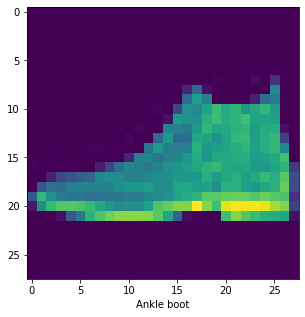

In [52]:
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1)
plt.grid(False)
plt.imshow(test_images[0])
plt.xlabel(class_names[test_labels[0]])

In [19]:
#혼란스러움의 정도를 채크해보기 위하여 axis=-1로 array를 만들어주자
y_pred_test = np.argmax(y_pred, axis= -1)
y_pred_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [20]:
#혼란스러움의 정도를 채크해보자.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(accuracy_score(test_labels, y_pred_test))
print(confusion_matrix(test_labels, y_pred_test))

0.8981
[[864   1  10  17   3   1 101   0   3   0]
 [  0 982   0  12   3   0   1   0   2   0]
 [ 17   0 788   8  91   0  95   0   1   0]
 [  9  14   7 901  31   0  35   0   3   0]
 [  1   1  20  22 872   0  82   0   2   0]
 [  0   0   0   0   0 990   0   6   0   4]
 [120   1  53  23  78   0 713   0  12   0]
 [  0   0   0   0   0  28   0 944   0  28]
 [  6   1   4   3   5   2   4   4 971   0]
 [  1   0   0   0   0   8   0  35   0 956]]


In [21]:
type(confusion_matrix(test_labels, y_pred_test))

numpy.ndarray

In [22]:
result = confusion_matrix(test_labels, y_pred_test)
result.shape

(10, 10)

In [24]:
result[0][0], result[1][1]

(864, 982)

In [25]:
result_acc = []
for x in range(0, 10):
    result_acc.append(result[x][x])
result_acc

[864, 982, 788, 901, 872, 990, 713, 944, 971, 956]

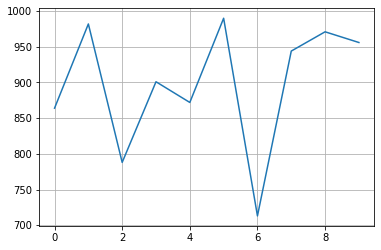

In [27]:
#각 숫자의 개수를 세어보자.(5가 가장 적음)
import matplotlib.pyplot as plt
plt.plot(result_acc)
plt.grid()
plt.show()

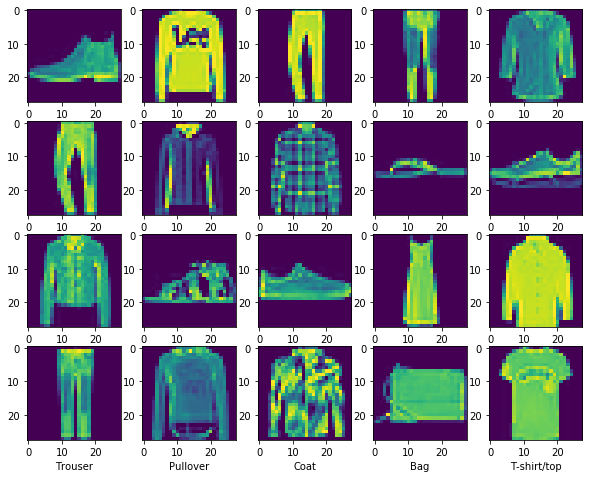

In [53]:

plt.figure(figsize=(10,10))
for x in range(20):
    plt.subplot(5, 5, x+1)
    plt.grid(False)
    plt.imshow(test_images[x])
    plt.xlabel(class_names[test_labels[x]])
# fig, axs = plt.subplots(1, 2, figsize=(2,2))
# axs[0].imshow(test_images[0])
# axs[0].axis('off')
# axs[1].imshow(test_images[1])
# axs[1].axis('off')
# plt.show()